<a href="https://colab.research.google.com/github/ben854719/Arctic-Sentinel-AI-Native-ISR-Dashboard/blob/main/ML_Risk_Forescast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get update
!apt-get install libboost-all-dev

Hit:1 https://cli.github.com/packages stable InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

In [4]:
%%writefile cpp_to_pipe.cpp
#include <iostream>
#include <fstream>
#include <sys/stat.h>
#include <fcntl.h>
#include <unistd.h>

int main() {
    const char* pipePath = "/tmp/telemetry_pipe";
    mkfifo(pipePath, 0666); // Create named pipe

    std::string telemetry = R"({
        "source": "ArcticStation01",
        "message": "Rising tension over resource access",
        "temperature": 36.5,
        "pollutionIndex": 120.0
    })";

    int fd = open(pipePath, O_WRONLY);
    write(fd, telemetry.c_str(), telemetry.size());
    close(fd);

    std::cout << "Telemetry sent to ML pipe.\n";
    return 0;
}

Writing cpp_to_pipe.cpp


In [2]:
!g++ telemetry.cpp -o telemetry
!./telemetry

Source: ArcticStation01
Sentiment: Negative
Environmental Stress: Detected
-----------------------------
Source: EnviroNode22
Sentiment: Positive
Environmental Stress: Normal
-----------------------------
Source: GeoFeed07
Sentiment: Neutral
Environmental Stress: Detected
-----------------------------


In [5]:
!g++ cpp_to_pipe.cpp -o cpp_to_pipe
!./cpp_to_pipe

^C


In [7]:
!pip install opencv-python
!pip install ffmpeg-python

In [8]:
import urllib.request

video_url = 'https://svs.gsfc.nasa.gov/vis/a000000/a005500/a005583/sea_ice_2025_min_2160p60_p60.mp4'
urllib.request.urlretrieve(video_url, 'downloaded_video.mp4')

('downloaded_video.mp4', <http.client.HTTPMessage at 0x7be0b9cbe630>)

In [10]:
import cv2

cap = cv2.VideoCapture('downloaded_video.mp4')

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Example: Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Save or process frame here

cap.release()

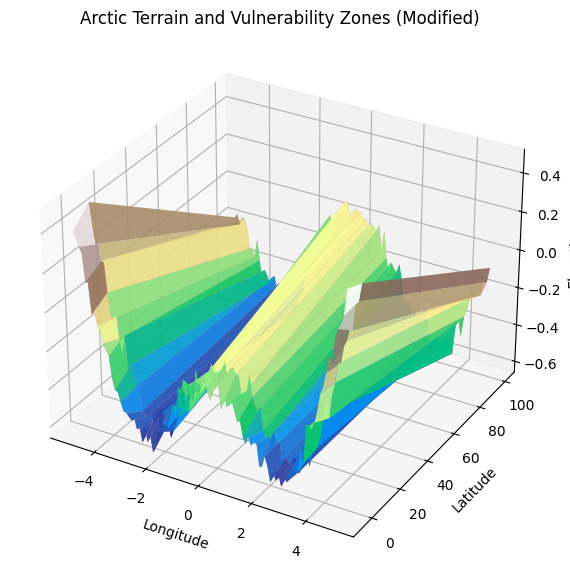

Generated 3D Arctic terrain visualization with vulnerability overlay and saved as arctic_terrain_vulnerability_modified.png


In [16]:
# Data Visualization.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#  Customizable Parameters
# Terrain generation parameters
x_range = (-5, 5)
y_range = (-5, 5)
resolution = 100
terrain_function_multiplier = 0.5
terrain_noise_strength = 0.05

# Vulnerability parameters
vulnerability_threshold = 0.2
vulnerability_color = 'red'
vulnerability_alpha = 0.4

# Plotting parameters
terrain_cmap = 'terrain' # Colormap for the terrain (e.g., 'viridis', 'cividis', 'terrain')
figure_size = (10, 7)
output_dpi = 300
output_filename = "arctic_terrain_vulnerability_modified.png"
# --------------------------------

# Generate synthetic elevation data
x = np.linspace(x_range[0], x_range[1], resolution)
y = np.meshgrid(y_range[0], y_range[1], resolution)
x, y = np.meshgrid(x, y)

# Main terrain function + noise
z = np.sin(np.sqrt(x**2 + y**2)) * terrain_function_multiplier + \
    np.cos(x) * 0.3 + np.random.normal(0, terrain_noise_strength, x.shape)

# Define vulnerability mask
vulnerability_mask = z < vulnerability_threshold

# Create figure and 3D axis
fig = plt.figure(figsize=figure_size)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap=terrain_cmap, edgecolor='none', alpha=0.9)

# Overlay vulnerability zones
z_masked = np.where(vulnerability_mask, z, np.nan)
ax.plot_surface(x, y, z_masked, color=vulnerability_color, alpha=vulnerability_alpha, edgecolor='none')

# Labeling
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Elevation')
ax.set_title('Arctic Terrain and Vulnerability Zones (Modified)')

# Save the figure
output_path = f"/content/{output_filename}"
plt.savefig(output_path, dpi=output_dpi)

# Display the plot in the notebook
plt.show()

print(f"Generated 3D Arctic terrain visualization with vulnerability overlay and saved as {output_filename}")

In [ ]:
Explanation:

This 3D visualization displays a synthetic Arctic terrain, highlighting areas identified as vulnerable (shown in red) based on their elevation falling below a specified threshold.